In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [4]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, header=None, names=column_names)

In [5]:
# Display first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


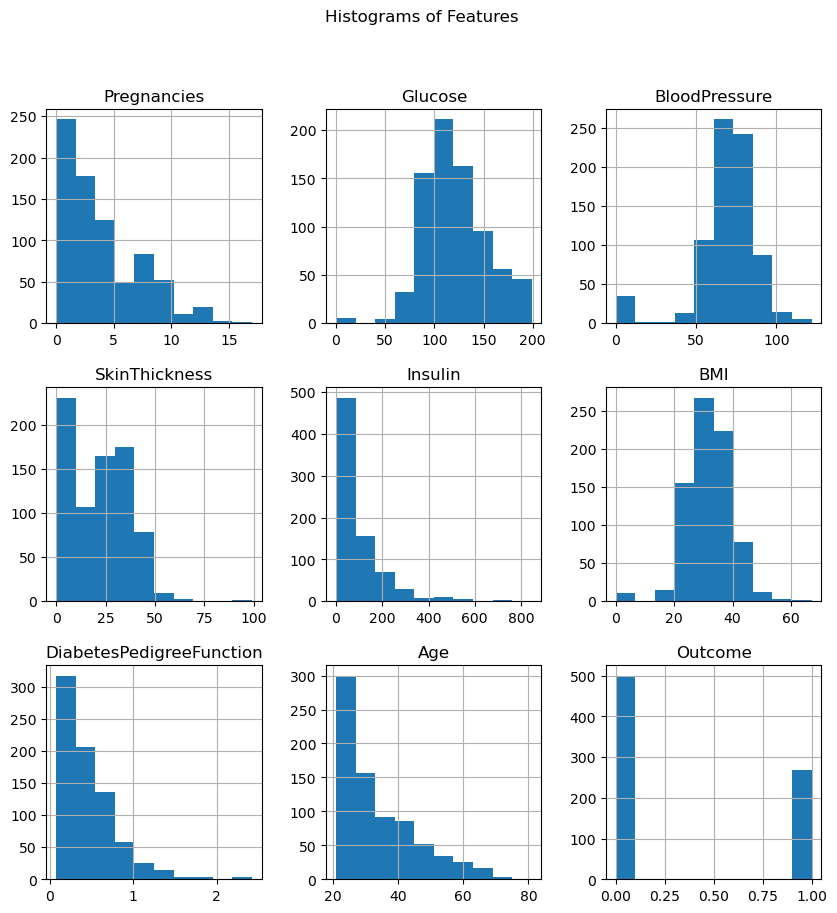

In [6]:
# Data visualization
# Histograms
data.hist(bins=10, figsize=(10, 10))
plt.suptitle('Histograms of Features')
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

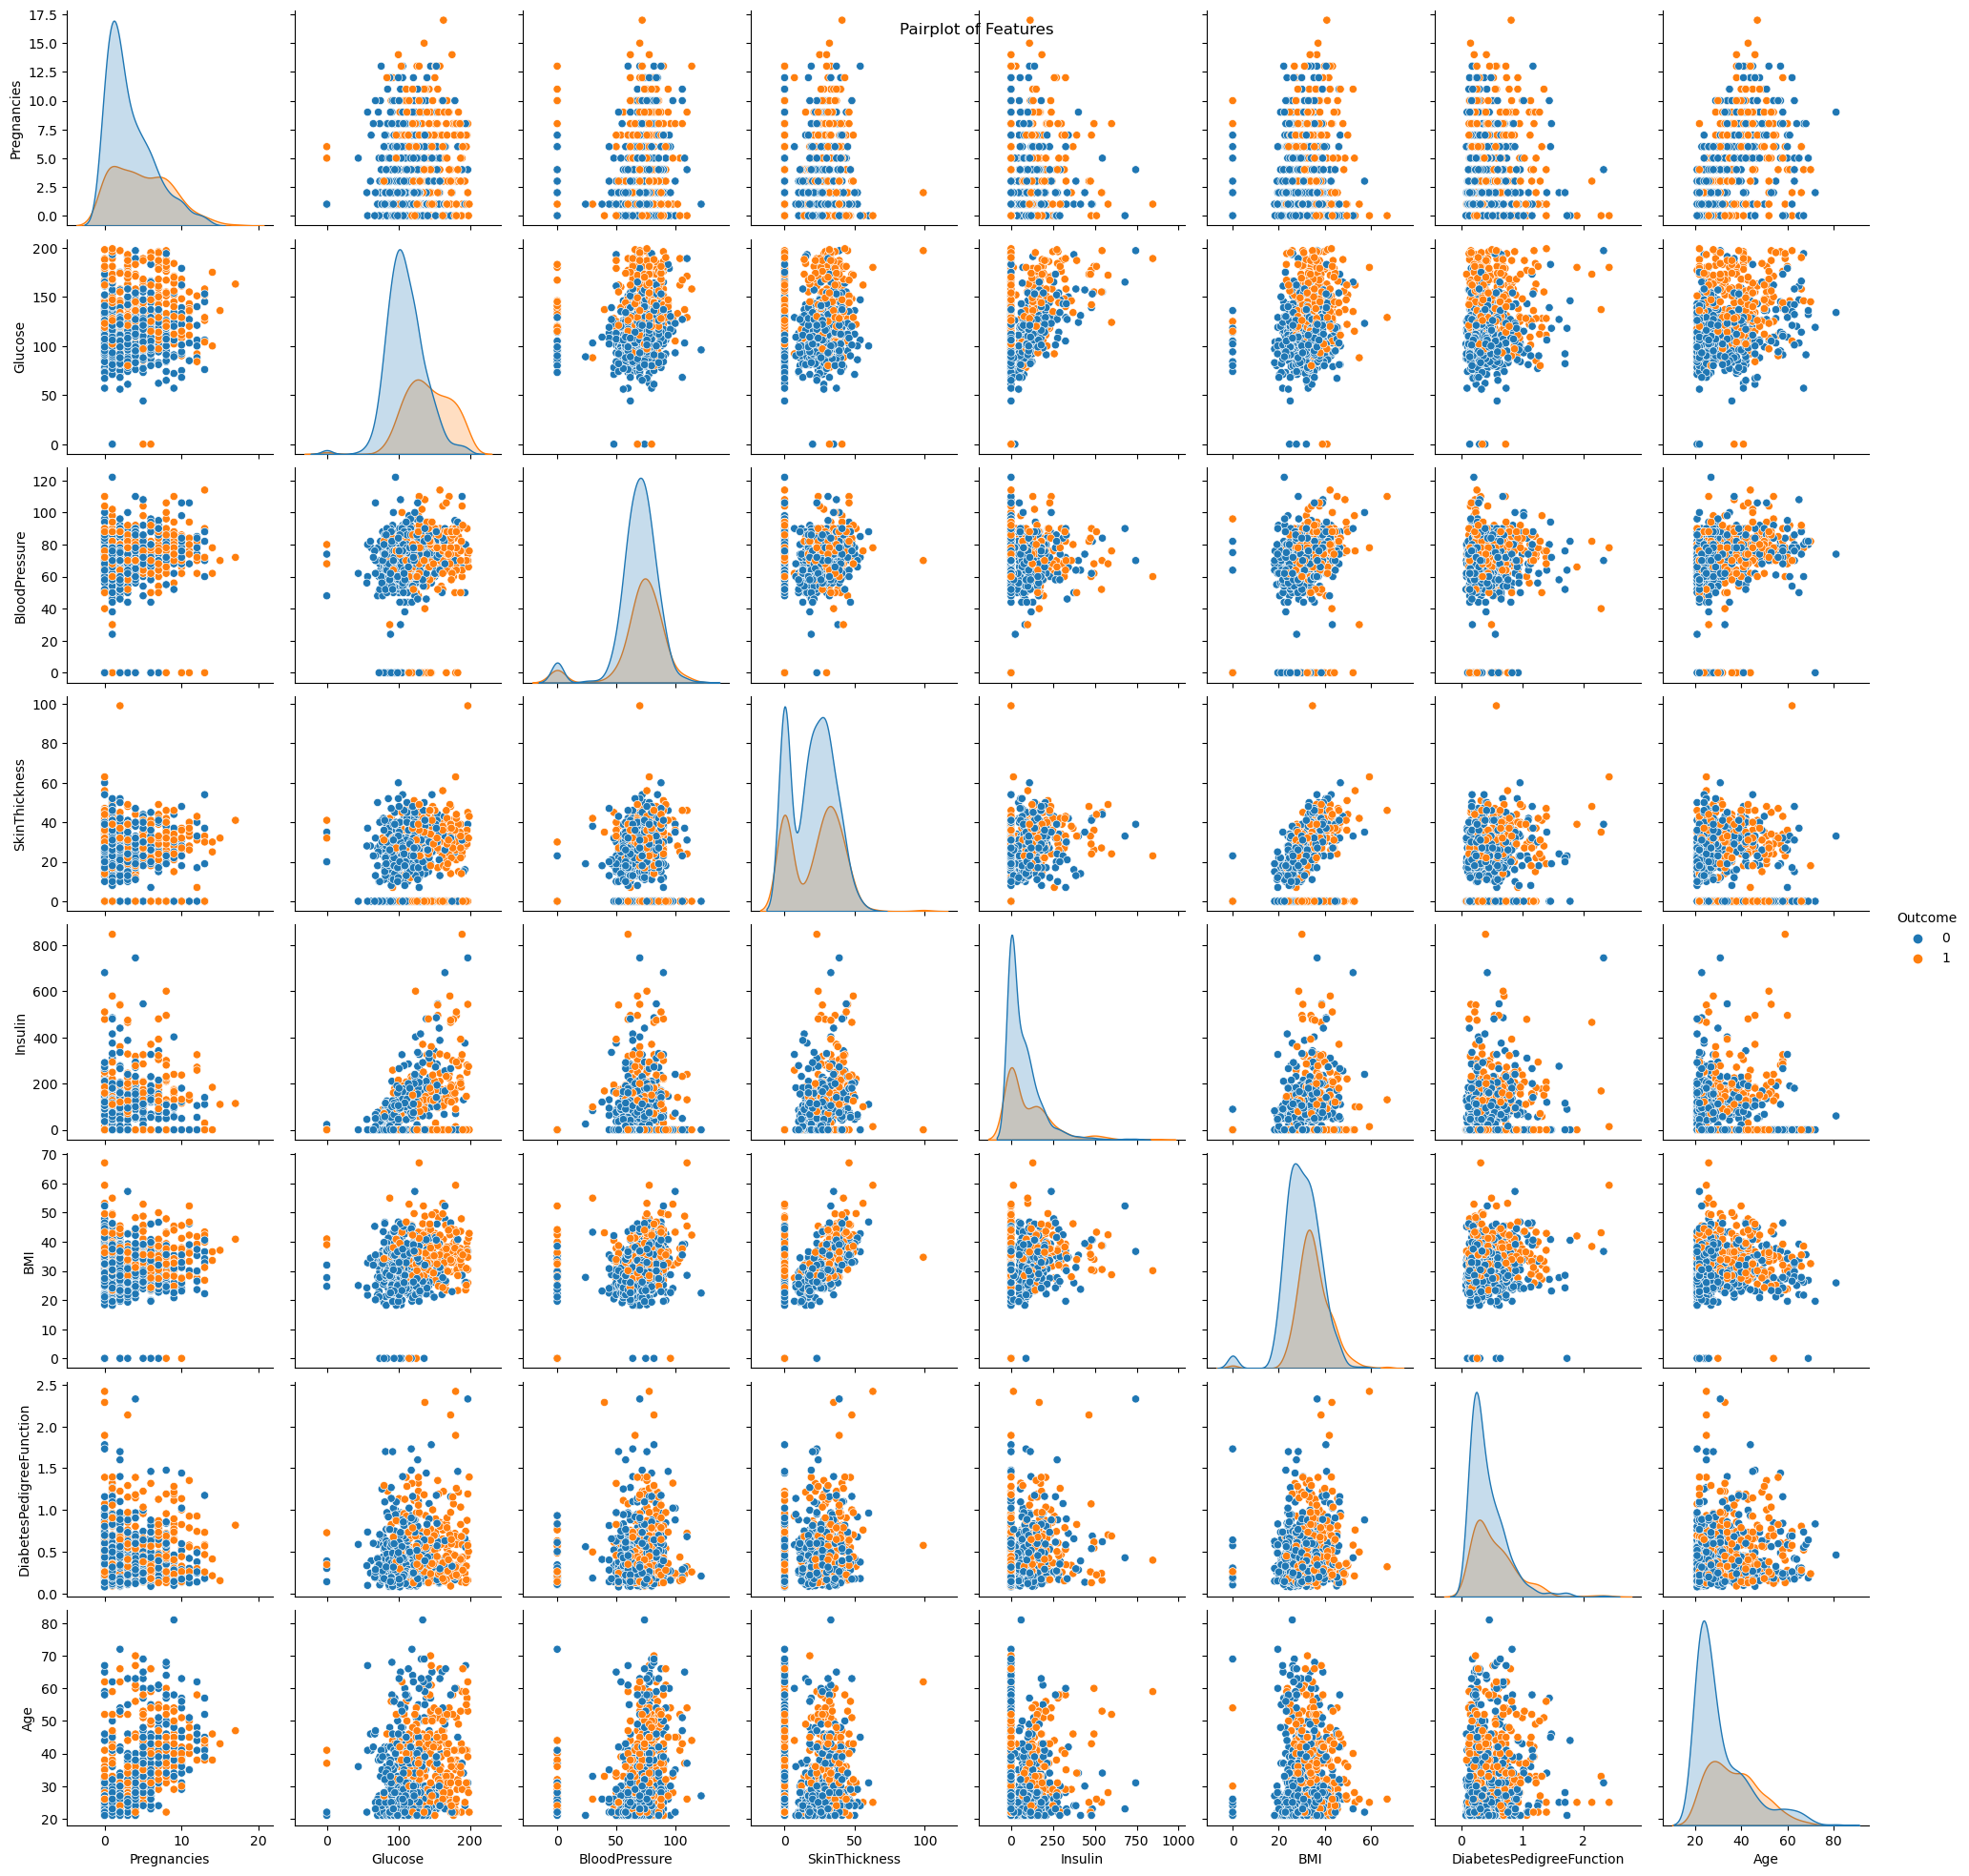

In [7]:
# Pair plot
sns.pairplot(data, hue='Outcome')
plt.suptitle('Pairplot of Features')
plt.show()

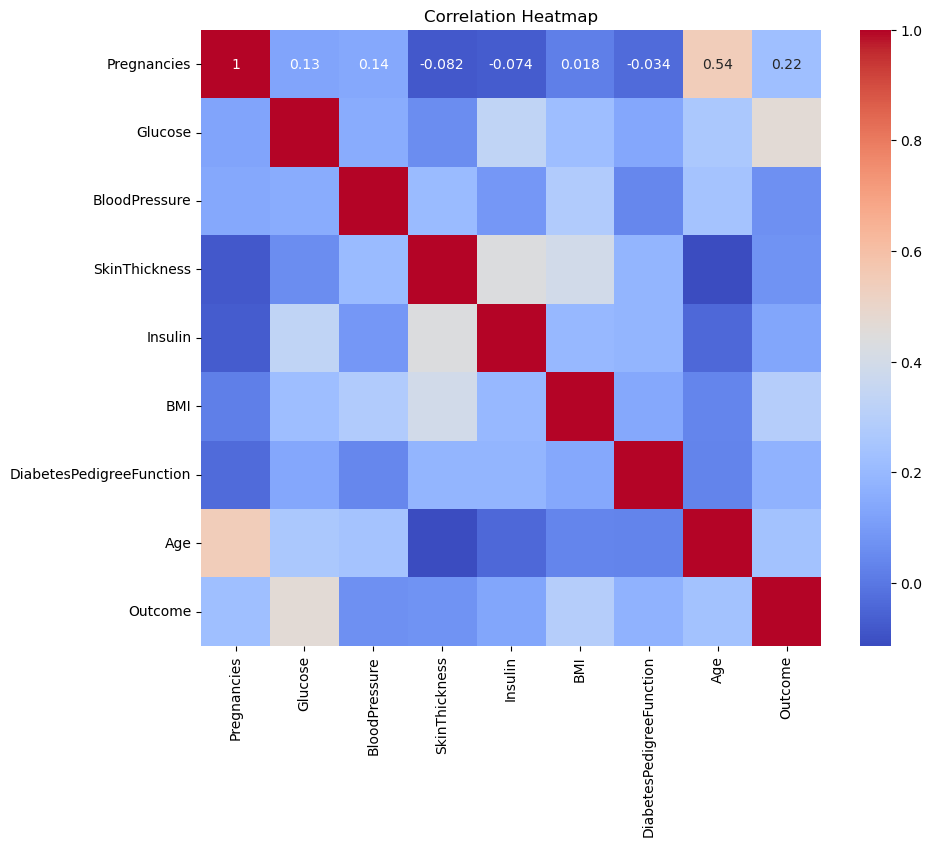

In [8]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
# Data preprocessing
# Check for missing values
print("Checking for missing values:")
print(data.isnull().sum())

Checking for missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [10]:
# Splitting data into features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [11]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")


Training set size: 576, Test set size: 192


In [12]:
# Initialize models
log_reg = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier(n_estimators=100)

In [13]:
# Train models
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
# Define parameter grids for hyperparameter tuning
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]}
param_grid_dt = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20]}


In [15]:
# Grid search for random forest
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [16]:
# Grid search for decision tree
grid_search_dt = GridSearchCV(estimator=decision_tree, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy')

In [17]:
# Best parameters
best_params_rf = grid_search_rf.best_params_
best_params_dt = grid_search_dt.best_params_
print(f"Best parameters for Random Forest: {best_params_rf}")
print(f"Best parameters for Decision Tree: {best_params_dt}")

Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 300}
Best parameters for Decision Tree: {'max_depth': 30, 'min_samples_split': 10}


In [18]:
# Predict on test set using the best models found by grid search
y_pred_log_reg = log_reg.predict(X_test)
y_pred_dt = grid_search_dt.predict(X_test)
y_pred_rf = grid_search_rf.predict(X_test)

In [19]:
# Function to evaluate model performance
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, cm

In [20]:
# Evaluate models
accuracy_log_reg, precision_log_reg, recall_log_reg, f1_log_reg, cm_log_reg = evaluate_model(y_test, y_pred_log_reg)
accuracy_dt, precision_dt, recall_dt, f1_dt, cm_dt = evaluate_model(y_test, y_pred_dt)
accuracy_rf, precision_rf, recall_rf, f1_rf, cm_rf = evaluate_model(y_test, y_pred_rf)

In [22]:
# Print evaluation metrics

# Logistic Regression
print(f"Logistic Regression - Accuracy: {accuracy_log_reg:.2f}, Precision: {precision_log_reg:.2f}, Recall: {recall_log_reg:.2f}, F1 Score: {f1_log_reg:.2f}")

# Decision Tree
print(f"Decision Tree - Accuracy: {accuracy_dt:.2f}, Precision: {precision_dt:.2f}, Recall: {recall_dt:.2f}, F1 Score: {f1_dt:.2f}")

# Random Forest
print(f"Random Forest - Accuracy: {accuracy_rf:.2f}, Precision: {precision_rf:.2f}, Recall: {recall_rf:.2f}, F1 Score: {f1_rf:.2f}")

Logistic Regression - Accuracy: 0.72, Precision: 0.61, Recall: 0.64, F1 Score: 0.62
Decision Tree - Accuracy: 0.70, Precision: 0.58, Recall: 0.64, F1 Score: 0.61
Random Forest - Accuracy: 0.74, Precision: 0.63, Recall: 0.65, F1 Score: 0.64


In [23]:
# Display confusion matrices
print("Confusion Matrix for Logistic Regression:")
print(cm_log_reg)
print("Confusion Matrix for Decision Tree:")
print(cm_dt)
print("Confusion Matrix for Random Forest:")
print(cm_rf)

Confusion Matrix for Logistic Regression:
[[95 28]
 [25 44]]
Confusion Matrix for Decision Tree:
[[91 32]
 [25 44]]
Confusion Matrix for Random Forest:
[[97 26]
 [24 45]]
